In [1]:
!pip install geopandas
!pip install descartes

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [4]:
%matplotlib inline

In [33]:
path = '/Users/vaishaligupta/Desktop/IT 7th Sem/DM project/Map/India.shp'
file_map = gpd.read_file(path)

In [16]:
df = pd.read_csv('clean_annual_dataset.csv')
df.head()

,Unnamed: 0,lon,lat,datetime,precip,altitude
0,2432,73.5,25.25,1983-01-01,828.56995,354.0
1,2434,73.5,25.25,1985-01-01,415.63610,354.0
2,2435,73.5,25.25,1986-01-01,440.32318,354.0
3,2436,73.5,25.25,1987-01-01,287.10270,354.0
4,2437,73.5,25.25,1988-01-01,581.54260,354.0


<AxesSubplot:>

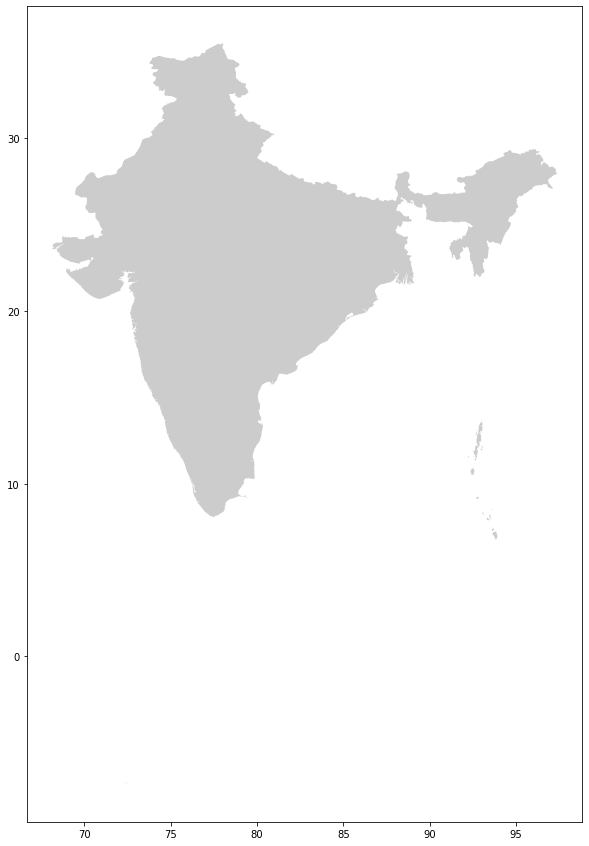

In [34]:
fig, ax = plt.subplots(figsize=(15,15))
file_map.plot(ax=ax,alpha=0.4, color='grey')

In [18]:
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]

In [20]:
geo_df = gpd.GeoDataFrame(df,
                         geometry=geometry)
geo_df.head()

,Unnamed: 0,lon,lat,datetime,precip,altitude,geometry
0,2432,73.5,25.25,1983-01-01,828.56995,354.0,POINT (73.50000 25.25000)
1,2434,73.5,25.25,1985-01-01,415.63610,354.0,POINT (73.50000 25.25000)
2,2435,73.5,25.25,1986-01-01,440.32318,354.0,POINT (73.50000 25.25000)
3,2436,73.5,25.25,1987-01-01,287.10270,354.0,POINT (73.50000 25.25000)
4,2437,73.5,25.25,1988-01-01,581.54260,354.0,POINT (73.50000 25.25000)


/Users/vaishaligupta/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


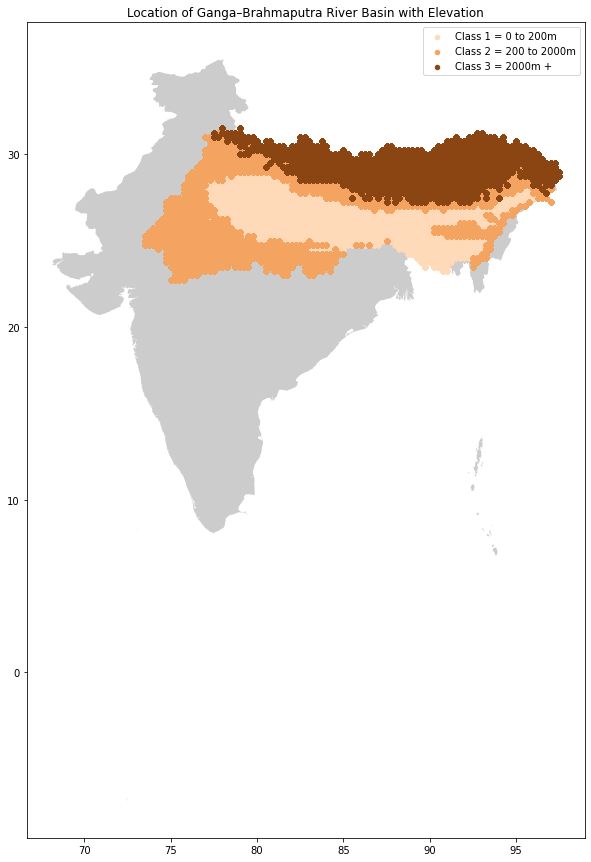

In [36]:
fig, ax = plt.subplots(figsize=(15,15))
file_map.plot(ax=ax,alpha=0.4, color='grey')
geo_df[geo_df['altitude'] < 200].plot(ax=ax, markersize=20, color='peachpuff', marker='o', label= 'Class 1 = 0 to 200m')
geo_df[geo_df['altitude'] >= 200][geo_df['altitude'] < 2000].plot(ax=ax, markersize=20, color='sandybrown', marker='o', label= 'Class 2 = 200 to 2000m')
geo_df[geo_df['altitude'] >= 2000].plot(ax=ax, markersize=20, color='saddlebrown', marker='o', label= 'Class 3 = 2000m +')
plt.legend()
plt.title('Location of Ganga–Brahmaputra River Basin with Elevation')
plt.savefig('Basin with elevation.pdf')